# Классификация

На первом нашем занятии мы разбирали и решали задачу регрессии - то есть задачу восстановления зависимости. Однако, на практике далеко не всегда требуется восстановить полную зависимость. Иногда достаточно определить то, к какому "типу" или "классу" относится объект. Задачи такого рода называются задачами классификации.

## Теоретические основы бинарной классификации

Простейшим случаем является _бинарная классификация_, то есть случай, когда у нас имеется два класса. Ключевое отличие от линейной регресси состоит в том, что пространство ответов состоит из двух элементов, например, возьмём $\mathbb{Y} = \{-1,1\}$, где -1 и 1 означают принадлежность к первому или второму классу, соответственно. Для задачи распознавания спам-писем эти значиния могли бы занчить: -1 означало, что письмо не является спамом, а 1 - что является.

В случае, если мы используем линейную модель, то для определения отношения к одному из двух классов достаточно взять знак результата работы этой модели. То есть на самом деле мы используем практически ту же модель, что и в случае с решением задачи регрессии:
$$ a(x) = \text{sign} \left ( \sum^{d}_{i=0}w_{i}x^{i} \right ) = \text{sign} \left ( \left \langle w,x \right \rangle \right ).$$

Множество точек $\left \langle w,x \right \rangle = 0$ образует _гиперплоскость_ в пространстве признаков и делит его на две части. Объекты, расположенние по разные стороны от нее, относятся к разным классам.

_Гиперплоскость_ - это обобщённое название плоскости для многомерного пространство (в случае двумерного пространство плоскость - это _прямая_). А часть математических оснований того, что мы будем здесь и далее обсуждать будет относится к разедам теории вероятности и линейной алгебры, которую изучают на 1-2 курсе университета. Разделяющая плоскость на рисунке ниже и будет называться гиперплоскостью в 3-ёх мерном пространстве.

На основании законов линейной алгебры, можно вывести, что расстояние до гиперплоскости будет равняться $\frac{| \left \langle w,x \right \rangle |}{||w||}$, соответственно, при классификации важен не только знак скалярного произведения $\left \langle w,x \right \rangle$, но и его значение: чем больше значение, тем больше будет расстояние от объекта до гиперплоскости, что будет означать, что алгоритм более уверен в отнесении объекта к данному классу.

Для корректного расчёта положения гиперплоскости значение _смещения_ должно быть равно скалярному произведению вектора весов $w$ на вектор признаков $x$, умноженному на истинное значение ответа $y$, которое, как мы помним, принимает значения -1 и 1:

$$M_{i}=y_{i}\left \langle w,x_{i} \right \rangle.$$

Если скалярное произведение отрицательно, и истинный ответ равен -1, смещение больше нуля. Если скалярное произведение положительно, и истинный ответ равен 1, смещение также будет положительным. То есть $M_{i}>0$, если классификатор даёт верный ответ, и $M_{i}<0$, когда классификатор ошибается. Смещение характеризует корректность ответа, а его абсолютное значение свидетельствует о расстоянии от разделяющей гиперплоскости.

Функционал ошибки задаётся для классификации очень просто и естественно. По существу - необходимо минимизировать минимальное число ответов.

$$Q(a, X) = \frac{1}{l}\sum^{l}_{i=1}[a(x_{i}) \neq y_{i})]$$

или, используя понятие смещения,

$$Q(a, X) = \frac{1}{l}\sum^{l}_{i=1}[M_{i}<0] = \frac{1}{l}\sum^{l}_{i=1}[y_{i}\left \langle w,x_{i} \right \rangle < 0)].$$

### Визуализация функции потерь

Под знаком суммы вы можете видеть то, что называется функцией потерь. В данном случае - реализуется простая пороговая функция потерь, которую очень легко визуализировать.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def loss_function(x):
    return 0 if x > 0 else 1

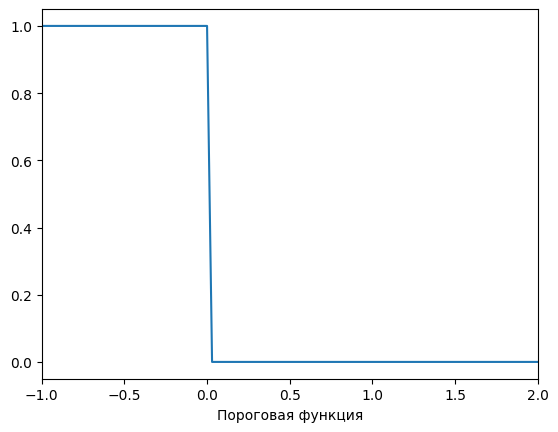

In [3]:
data = np.linspace(-1, 2, 100)
loss = [loss_function(x) for x in data]

plt.xlabel('Пороговая функция')
plt.xlim(-1, 2)
plt.plot(data, loss)
plt.show()

### Проблемы пороговых функций

Известно, что пороговая функция недифференцируема, то есть от неё нельзя взять производную, а значит и нельзя использовать градиентный спуск. В практике используют функции, которые дифференцируемы и больше по значению, чем функция потерь. То есть:

$$[M_{i}<0] \leq \tilde{L}(M_{i}).$$

Тогда минимизировать уже надо эту новую функцию:

$$Q(a, X) \leq \tilde Q(a, X) = \frac{1}{l}\sum^{l}_{i=1}\tilde{L}(M_{i}) \rightarrow \underset{w}{\text{min}}.$$

Примеры:

- _экспоненциальная функция потерь_ $\tilde{L}(M_{i}) = \text{exp}(- M_{i})$;


- _квадратичная функция потерь_ $\tilde{L}(M_{i}) = (1- (M_{i}))^{2}$;


- _логистическая функция потерь_ $\tilde{L}(M_{i}) = \text{log}_{2}(1 + \text{exp}(- M_{i}))$;

In [4]:
def exp_loss_func(x):
    return np.exp(-x)

In [5]:
def square_loss(x):
    return (1 - x) ** 2

In [6]:
def logistic_loss(x):
    return np.log2(1 + np.exp(-x))

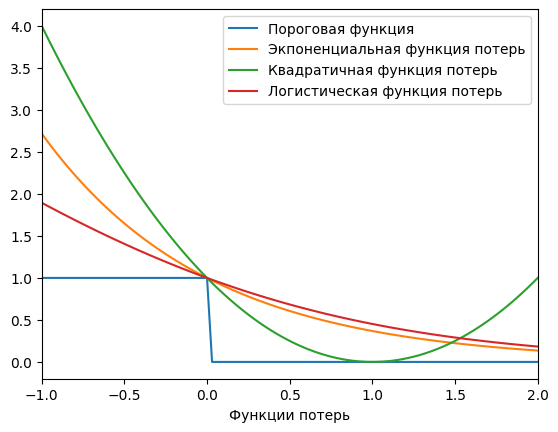

In [7]:
exp_loss = [exp_loss_func(x) for x in data]
logistic_loss_l = [logistic_loss(x) for x in data]
square_loss_l = [square_loss(x) for x in data]

plt.xlabel('Функции потерь')
plt.xlim(-1, 2)
plt.plot(data, loss)
plt.plot(data, exp_loss)
plt.plot(data, square_loss_l)
plt.plot(data, logistic_loss_l)
plt.legend(['Пороговая функция', 'Экпоненциальная функция потерь', 'Квадратичная функция потерь', 'Логистическая функция потерь'])
plt.show()

## Логистическая регрессия

_Логистическая регрессия_ — частный случай линейного классификатора, обладающий одной полезной особенностью — помимо отнесения объекта к определённому классу она умеет прогнозировать вероятность $P$ того, что объект относится к этому классу. Логистическая регрессия потому называется регрессией, что выводится из линейной регрессии.

Однако, _логистическая регрессия_ вовсе не _регрессия_ по своей природе, а _классификатор_. Не перепутайте =)



Пусть в каждой точке пространства объектов $\mathbb{X}$ задана вероятность того, что объект $x$ будет принадлежать к классу «+1» $P(y=1|x)$. Она будет принимать значения от 0 до 1 - наша задача её предсказывать. Решение этой задачи регрессионным методом выглядит так: $b(x)=\left \langle w,x_{i} \right \rangle$.

Но у этого решения есть проблема, связанная с тем, что скалярное произведение $\left \langle w,x_{i} \right \rangle$ не всегда возвращает значения в отрезке [0, 1].

Чтобы достичь такого условия, можно использовать некую функцию $\sigma:\mathbb{R} \rightarrow [0,1]$, которая станет переводить полученное в скалярном произведении значение в вероятность, а пределы такой вероятности будут лежать в промежутке от 0 до 1. В модели логистической регрессии в качестве такой функции берётся сигмоида, которая имеет вид:

$$\sigma(z) = \frac{1}{1 + exp(-z)}.$$

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

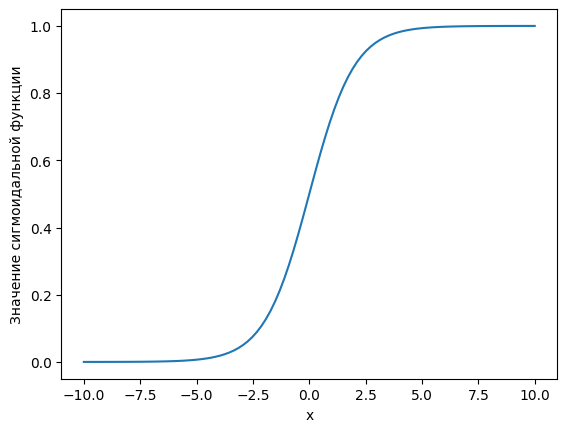

In [9]:
data = np.linspace(-10, 10, 100)
sigmoid_value = list(map(sigmoid, data))

plt.xlabel('x')
plt.ylabel('Значение сигмоидальной функции')
plt.plot(data, sigmoid_value)
plt.show()

$P(y=1|x)$, для краткости обозначим $p_{+}$, будет равняться

$$p_{+} = \frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}$$

Чем больше будет скалярное произведение $\left \langle w,x_{i} \right \rangle$, тем выше окажется предсказанная вероятность.

При этом мы знаем как рассчитать скалярное производение, но не знаем, как рассчитать вероятность. Выведем необходимые значения:

$$\left \langle w,x_{i} \right \rangle = \text{ln} \frac{p_{+}}{1 - p_{+}}.$$

Выражение под логарифмом называется _риском_ (отношение вероятности положительного события к, по сути, вероятности отрицательного события), а вместе с логарифмом это выражение называется _логитом_. Поэтому метод и называется логистической регрессией: мы приближаем логит линейной комбинацией признаков и весов.

Для обучения этой модели (а точнее, подбора расчётной функции, которую можно использовать для обучения) нам потребуется использовать _метод максимального правдоподобия_. Его сущность заключается в выборе гипотезы, при которой вероятность получить имеющееся наблюдение максимальна.

С точки зрения реализуемого алгоритма, вероятность того, что в выборке встретится объект $x_{i}$ c классом $y_{i}$, равна

$$P(y=y_{i}|x_{i}) = p_{+}^{[y_{i}=+1]}(1-p_{+})^{[y_{i}=-1]}.$$

Для всей выборки это значение будет равно производению её элементов:

$$P(y|X) = L(X) = \prod^{l}_{i=1} p_{+}^{[y_{i}=+1]}(1-p_{+})^{[y_{i}=-1]}.$$

Проблема производения в том, что его крайне тяжело оптимизировать. Для решения проблемы "произведения" рационально использовать логарифмирование:

$$-\text{ln}L(X) = -\sum^{l}_{i=1}([y_{i} = +1] \text{ln}p_{+} + [y_{i} = -1]\text{ln}(1 - p_{+})).$$

Эта функция потерь называется _логарифмической функцией потерь (log loss),_ или _кросс-энтропией_.

Обратите внимание на знак "-" перед логарифмом. Он необходим для того, чтобы перейти от задачи "максимального" праводоподобия к задаче "минимального" минус правдоподобия.

Когда $y$ принимает значения 0 и 1, log loss запишется как

$$-\text{ln}L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)} + (1 - y_{i})\text{ln} (1-\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)})).$$

$$-\text{ln}L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}(\sigma) + (1 - y_{i})\text{ln} (1-\sigma)).$$



### Практическая реализация

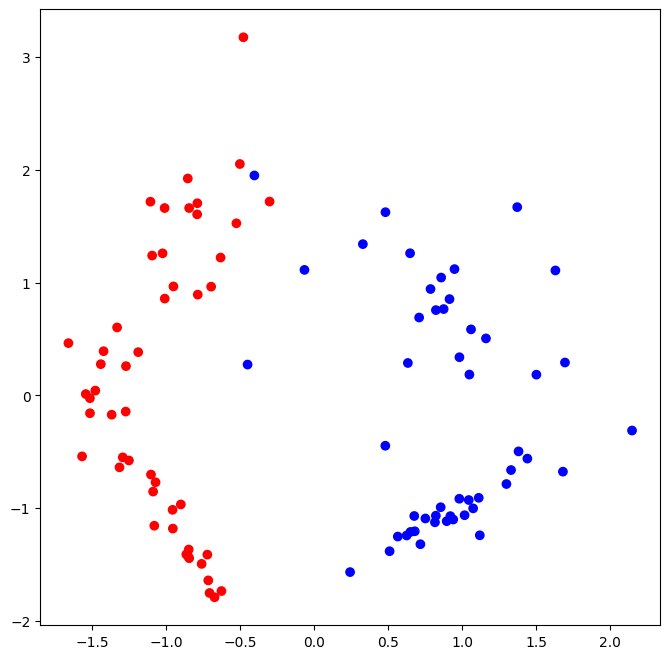

In [10]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

# сгеренируем данные
classes = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)

# и изобразим их на графике
colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)

plt.show()

При работе с набором данных их рекомендуется перемешивать перед тем, как разделять на обучающую и тестовые выборки. Сделаем это.

In [11]:
# перемешивание датасета
np.random.seed(12) # это число позволяет постоянно получать одну и ту же "случайность"
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]

print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


Оптимизируем функционал ошибки, используя градиентный спуск, его вид в случае использования такой функции потерь будет:

$$w_{n+1} = w_{n} - \eta \frac{1}{l}X( \frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}-Y)^{T},$$

In [22]:
class LogReg:
    def __init__(self, fit_intercept=True, th=0.5):
        self.fit_intercept = fit_intercept
        self.th = th
        self.losses = []
        
    def fit(self, X: np.ndarray, y: np.ndarray, n_iterations=100, eta=0.1):
        if not hasattr(self, "w"):
            self.w = np.zeros(X.shape[1] + int(self.fit_intercept))
        if self.fit_intercept:
            X = np.hstack((X, np.ones((X.shape[0], 1))))
        self.losses = []

        for _ in range(n_iterations):
            loss, grad = self.log_loss(X, y)
            self.w -= eta * grad
            self.losses.append(loss)

        return self
    
    def logits(self, X):
        if self.fit_intercept:
            X = np.hstack((X, np.ones((X.shape[0], 1))))
        return X @ self.w
    
    def predict(self, X):
        logits = self.logits(X)
        probs = sigmoid(logits)
        return (probs > self.th).astype(int)
    
    def log_loss(self, X: np.ndarray, y: np.ndarray):
        """
        w : np.ndarray[float]
            weights. Shape (n_features,)
        X : np.ndarray[float]
            features. Shape (n_samples, n_features)
        y : np.ndarray[int]
            target. Shape (n_samples,)
        """
        loss = y * np.log(sigmoid(X @ self.w)) + (1 - y) * np.log(sigmoid(-X @ self.w))
        grad = X.T @ (sigmoid(X @ self.w) - y)
        return -np.mean(loss), grad / X.shape[0]

Проведём первый простой эксперимент и посмотрим на результат.

In [23]:
model = LogReg().fit(X_train, y_train, n_iterations=1000, eta=0.05)

In [24]:
y_predicted_test = model.predict(X_test)
y_predicted_train = model.predict(X_train)

train_accuracy = 1 - np.mean(np.abs(y_predicted_train - y_train))
test_accuracy = 1 - np.mean(np.abs(y_predicted_test-y_test))

print(f"Итоговый вектор весов w: {model.w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [3.76368713 0.22385252 0.38802205]
Точность на обучающей выборке: 0.986
Точность на тестовой выборке: 0.967


Визуализируем результат и функцию потерь

$ logit = w_0 * x_2 + w_1 * x_1 + w_2 $

разделяющая гиперплоскость: $ logit = 0 $, $ x_2 = -\frac{w_0}{w_1} - \frac{w_2}{w_1} $

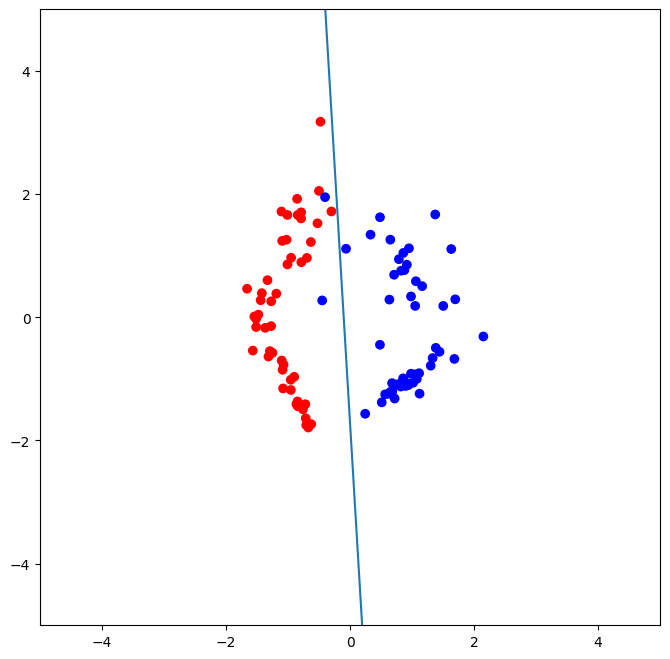

In [20]:
data = np.linspace(-2, 2, 100)

plt.figure(figsize=(8, 8))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
# plt.gca().set_aspect('equal')
plt.scatter(classes[0][:, 0], classes[0][:, 1], c=classes[1], cmap=colors)
plt.plot(data, -model.w[0] / model.w[1] * data - model.w[2] / model.w[1])
plt.show()

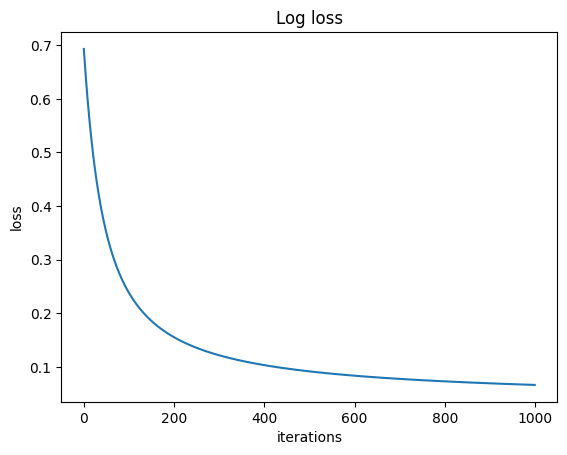

In [21]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(model.losses)), model.losses)

plt.show()

В заверешении подберём различные значения порога для определения точности

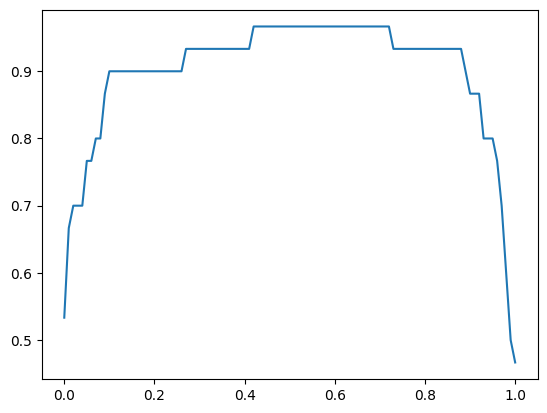

In [102]:
test_acc = []
b_l = []

for b in range(0, 101):
  model.th = b/100
  y_predicted_test = model.predict(X_test)
  y_predicted_train = model.predict(X_train)

  test_accuracy = 1 - np.mean(np.abs(y_predicted_test-y_test_tr))

  b_l.append(b/100)
  test_acc.append(test_accuracy)

plt.plot(b_l, test_acc)
plt.show()